Prince Kumar sharma


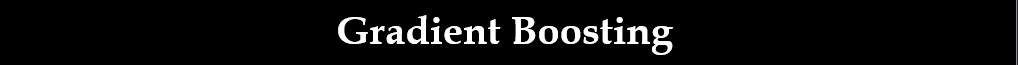



Gradient Boosting is a popular machine learning algorithm for both classification and regression problems. It is an ensemble learning method that combines the predictions of multiple weak models to create a more accurate final prediction. 

The algorithm works by iteratively training a sequence of weak decision trees, with each tree attempting to correct the errors made by the previous tree. At each iteration, the algorithm identifies the instances in the training data that were most poorly predicted by the previous ensemble, and assigns higher weights to these instances in order to prioritize them in the next iteration. 

Gradient boosting uses the gradient descent optimization algorithm to minimize the loss function of the model. The goal of the algorithm is to minimize the difference between the predicted values and the actual values. 

Gradient Boosting has become popular due to its high accuracy and ability to handle different types of data, including categorical and numerical data. It is widely used in machine learning competitions, such as Kaggle, and has been shown to achieve state-of-the-art results in many domains.

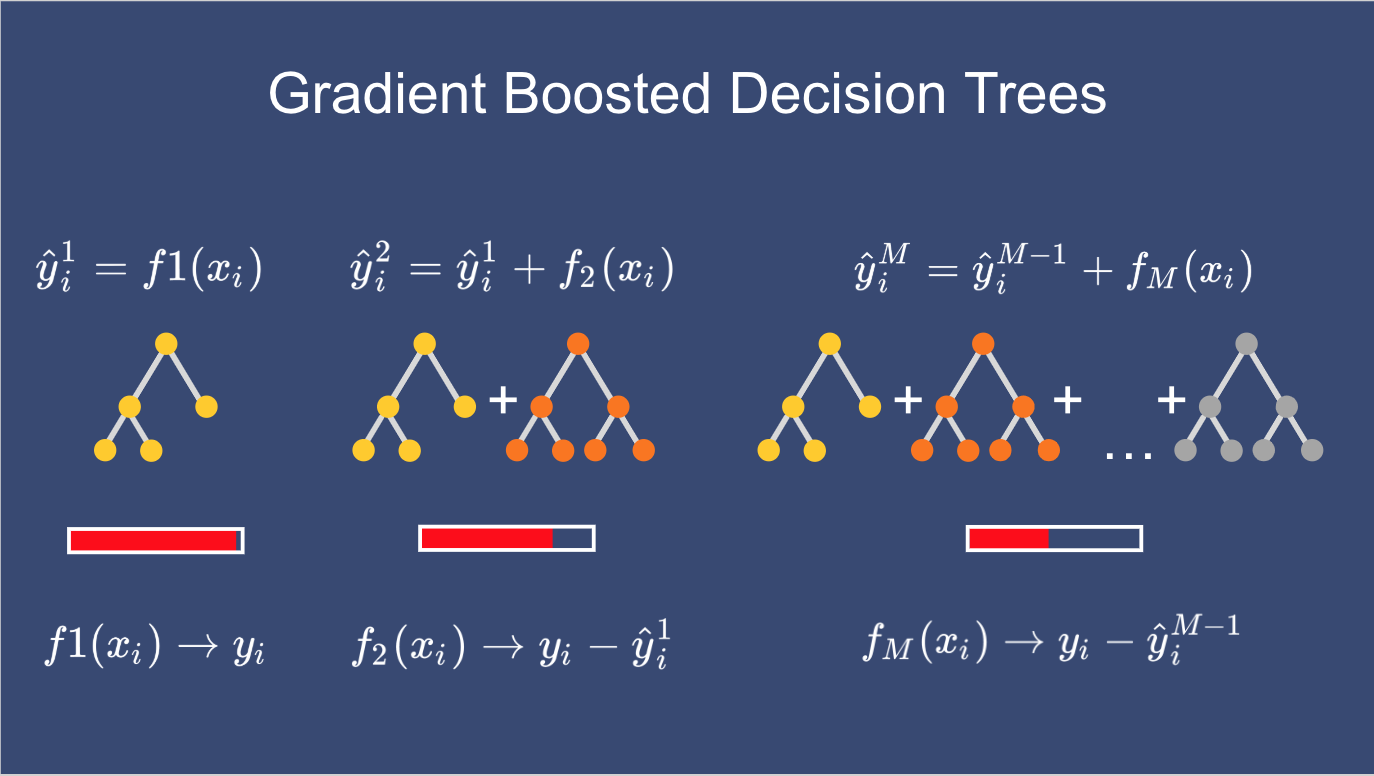

# What is Gradient Boosting ?
* Gradient Boosting Machine learning is one of the most popular technologies to build predictive models for various complex regression and classification tasks. Gradient Boosting Machine (GBM) is considered one of the most powerful boosting algorithms.

## GBM in Machine Learning
* Although, there are so many algorithms used in machine learning, boosting algorithms has become mainstream in the machine learning community across the world. Boosting technique follows the concept of ensemble learning, and hence it combines multiple simple models (weak learners or base estimators) to generate the final output. GBM is also used as an ensemble method in machine learning which converts the weak learners into strong learners. In this topic, "GBM in Machine Learning" we will discuss gradient machine learning algorithms, various boosting algorithms in machine learning, the history of GBM, how it works, various terminologies used in GBM, etc. But before starting, first, understand the boosting concept and various boosting algorithms in machine learning.

## What is Boosting in Machine Learning?
* Boosting is one of the popular learning ensemble modeling techniques used to build strong classifiers from various weak classifiers. It starts with building a primary model from available training data sets then it identifies the errors present in the base model. After identifying the error, a secondary model is built, and further, a third model is introduced in this process. In this way, this process of introducing more models is continued until we get a complete training data set by which model predicts correctly.

AdaBoost (Adaptive boosting) was the first boosting algorithm to combine various weak classifiers into a single strong classifier in the history of machine learning. It primarily focuses to solve classification tasks such as binary classification.

## How do GBM works?
Generally, most supervised learning algorithms are based on a single predictive model such as linear regression, penalized regression model, decision trees, etc. But there are some supervised algorithms in ML that depend on a combination of various models together through the ensemble. In other words, when multiple base models contribute their predictions, an average of all predictions is adapted by boosting algorithms.

### Gradient boosting machines consist 3 elements as follows:
1. Loss function
2. Weak learners
3. Additive model
Let's understand these three elements in detail.

1. Loss function:
* Although, there is a big family of Loss functions in machine learning that can be used depending on the type of tasks being solved. The use of the loss function is estimated by the demand of specific characteristics of the conditional distribution such as robustness. While using a loss function in our task, we must specify the loss function and the function to calculate the corresponding negative gradient. Once, we get these two functions, they can be implemented into gradient boosting machines easily. However, there are several loss functions have been already proposed for GBM algorithms.


### Classification of loss function:
* Based on the type of response variable y, loss function can be classified into different types as follows:

* Continuous response, y ∈ R:
* Gaussian L2 loss function
* Laplace L1 loss function
* Huber loss function, δ specified
* Quantile loss function, α specified
* Categorical response, y ∈ {0, 1}:
* Binomial loss function
* Adaboost loss function
* Other families of response variables:
* Loss functions for survival models
* Loss functions count data
* Custom loss functions

### Weak Learner:
Weak learners are the base learner models that learn from past errors and help in building a strong predictive model design for boosting algorithms in machine learning. Generally, decision trees work as a weak learners in boosting algorithms.

Boosting is defined as the framework that continuously works to improve the output from base models. Many gradient boosting applications allow you to "plugin" various classes of weak learners at your disposal. Hence, decision trees are most often used for weak (base) learners.

## EXTREME GRADIENT BOOSTING MACHINE (XGBM)
XGBM is the latest version of gradient boosting machines which also works very similar to GBM. In XGBM, trees are added sequentially (one at a time) that learn from the errors of previous trees and improve them. Although, XGBM and GBM algorithms are similar in look and feel but still there are a few differences between them as follows:

XGBM uses various regularization techniques to reduce under-fitting or over-fitting of the model which also increases model performance more than gradient boosting machines.
XGBM follows parallel processing of each node, while GBM does not which makes it more rapid than gradient boosting machines.
XGBM helps us to get rid of the imputation of missing values because by default the model takes care of it. It learns on its own whether these values should be in the right or left node.

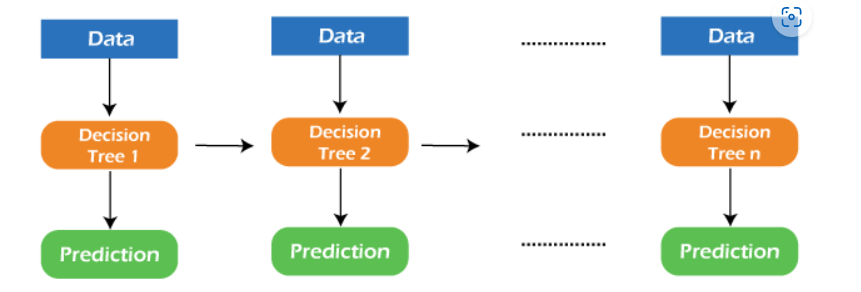

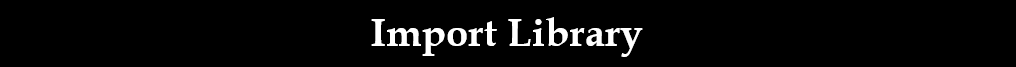

In [92]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as mns
import pylab
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score

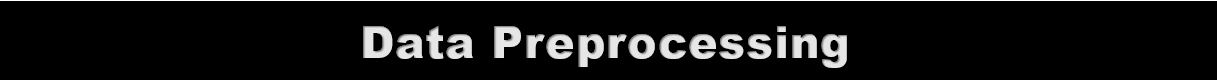

In [93]:
df=pd.read_csv("C:/Users/Prince kumar/OneDrive/Desktop/mldataset/Social_Network_Ads.csv")

In [94]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [45]:
df.shape

(400, 5)

In [46]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [48]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

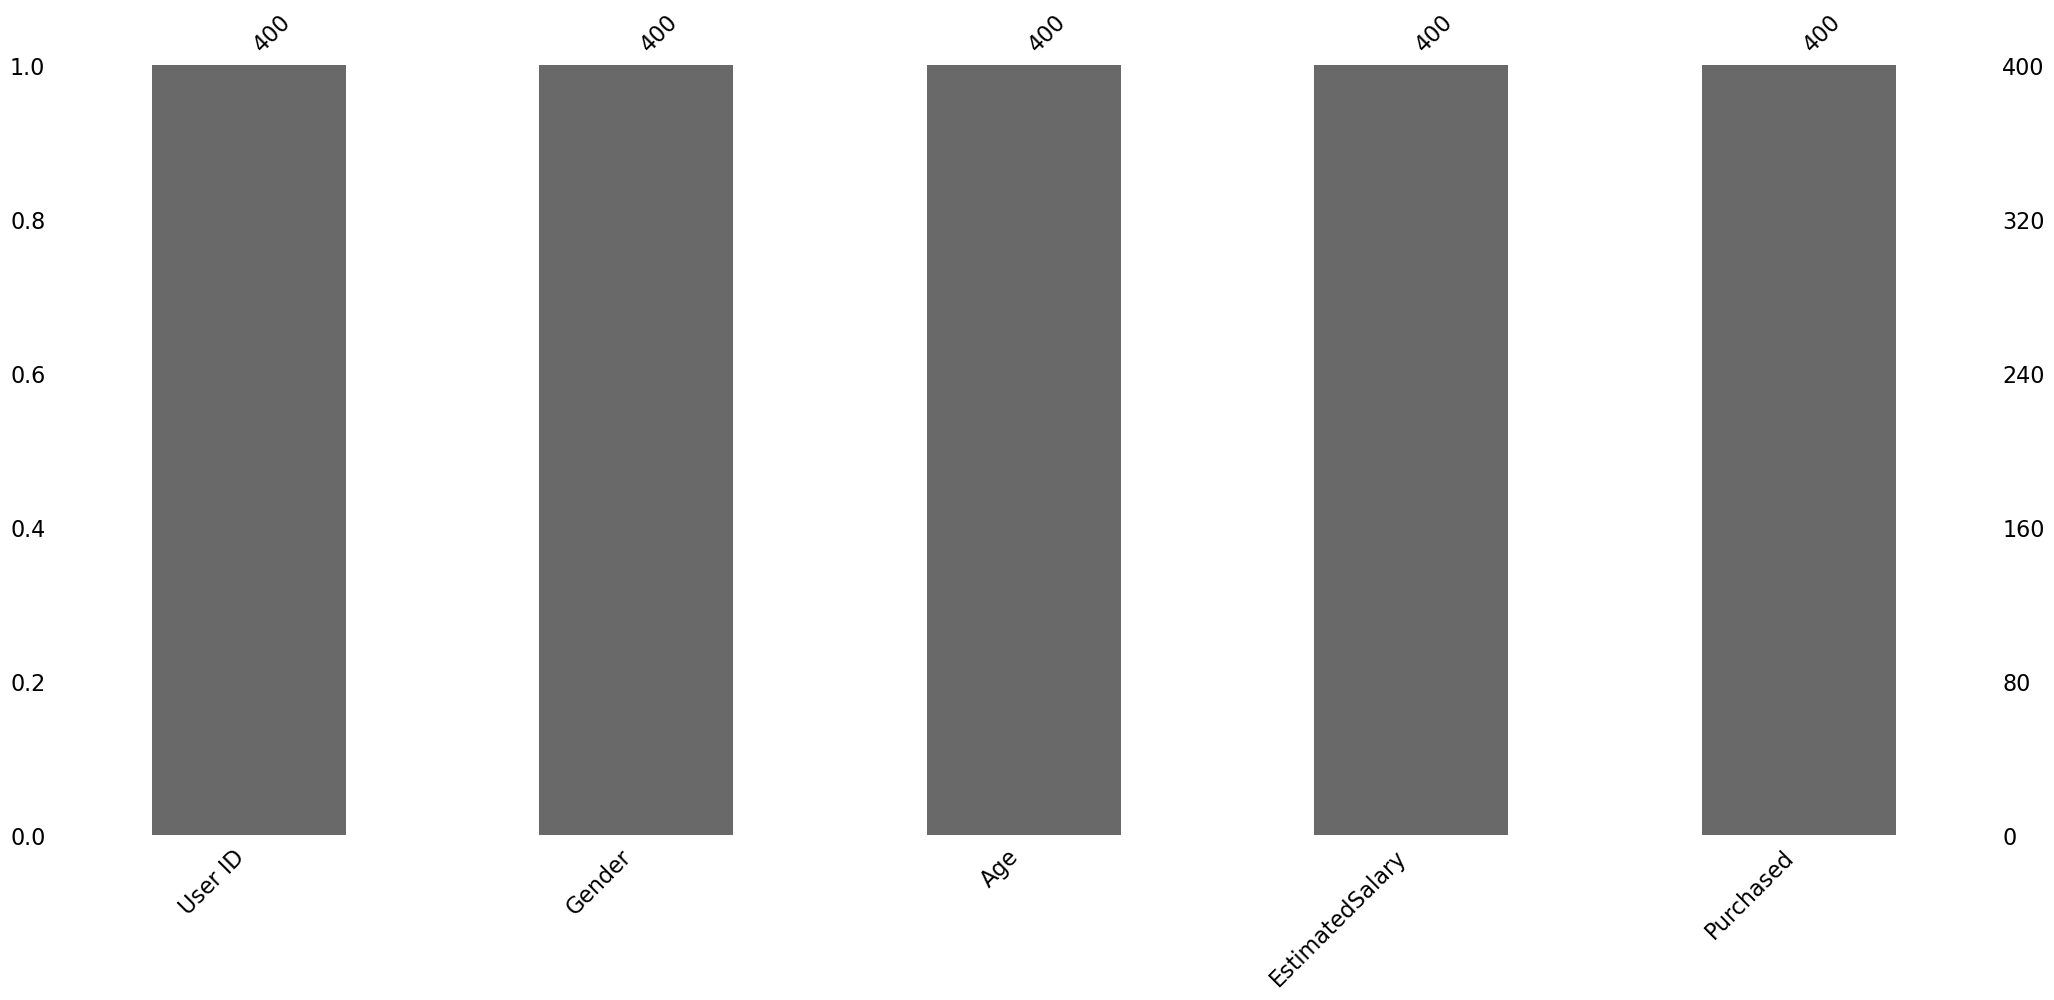

In [49]:
mns.bar(df);

In [50]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [51]:
df.drop("User ID",axis=1,inplace=True)

In [52]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [53]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

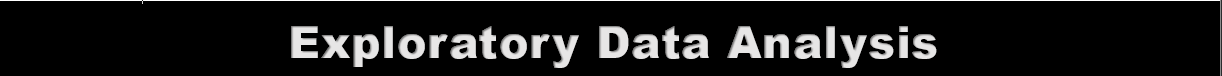

In [54]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [57]:
a=df['Gender'].value_counts().reset_index()
a

,index,Gender
0,Female,204
1,Male,196


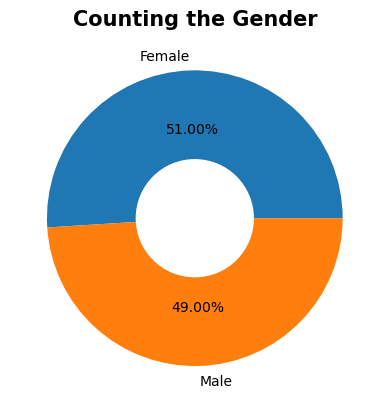

In [60]:
plt.pie(a['Gender'],labels=a['index'],autopct="%0.2f%%",radius=1)
plt.pie([1],colors="w",radius=0.4)
plt.title("Counting the Gender",fontweight="bold",fontsize=15)
plt.show()

# observation
1. There is Number of Female is Greater than Male
2. 51% is Female and 49% is Male 

In [61]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


Text(0.5, 1.0, 'Counting the Age of the Person Who Purchase or not')

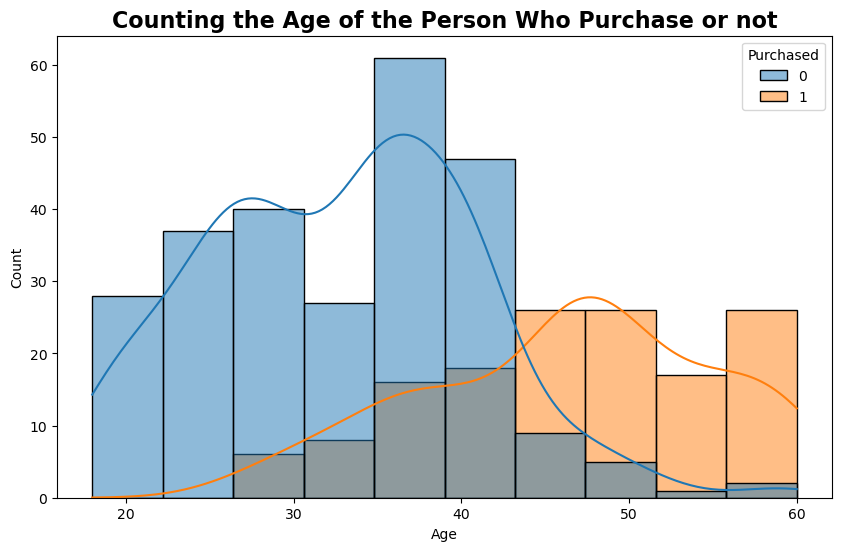

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="Age",hue="Purchased",kde=True)
plt.title("Counting the Age of the Person Who Purchase or not",fontweight="bold",fontsize=16,color="black")

In [66]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [68]:
df["EstimatedSalary"].unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

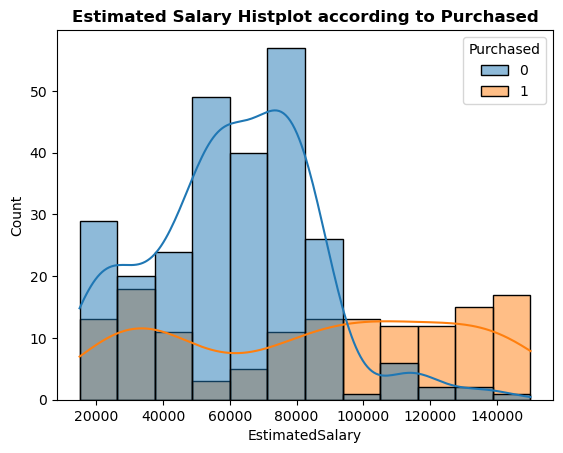

In [73]:
sns.histplot(data=df,x="EstimatedSalary",hue="Purchased",kde=True)
plt.title("Estimated Salary Histplot according to Purchased",fontweight="bold")
plt.show()

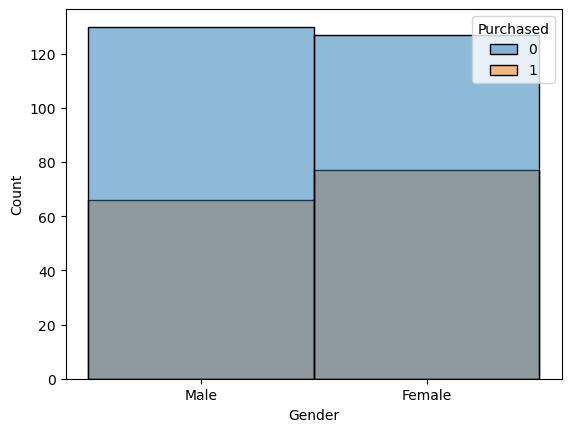

In [76]:
sns.histplot(data=df,x="Gender",hue='Purchased')
plt.show()

In [77]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [80]:
df['Purchased'].value_counts().reset_index()

,index,Purchased
0,0,257
1,1,143


In [81]:
ln=LabelEncoder()

In [82]:
df['Gender']=ln.fit_transform(df['Gender'])

In [83]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Extracting the The train and test data

In [84]:
x=df.drop("Purchased",axis=1)

In [87]:
x.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Gender,1,1,0,0,1,1,0,0,1,0,0,0,1,1,1
Age,19,35,26,27,19,27,27,32,25,35,26,26,20,32,18
EstimatedSalary,19000,20000,43000,57000,76000,58000,84000,150000,33000,65000,80000,52000,86000,18000,82000


In [88]:
y=df[["Purchased"]]

In [95]:
y.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Purchased,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Train test and splitting the data

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [99]:
print("-"*110)
print(f"The Shape of the x_train is : {x_train.shape}")
print("-"*110)
print(f"The shape of the y_train is : {y_train.shape}")
print("-"*110)
print(f"The Shape of the x_test is : {x_test.shape}")
print("-"*110)
print(f"The shape of the y_test is : {y_test.shape}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The Shape of the x_train is : (320, 3)
--------------------------------------------------------------------------------------------------------------
The shape of the y_train is : (320, 1)
--------------------------------------------------------------------------------------------------------------
The Shape of the x_test is : (80, 3)
--------------------------------------------------------------------------------------------------------------
The shape of the y_test is : (80, 1)
--------------------------------------------------------------------------------------------------------------


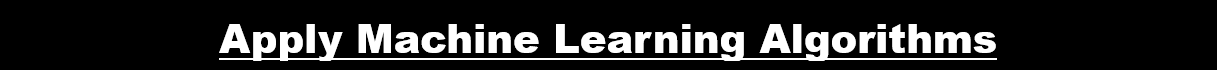

In [104]:
print("-"*110)
gbr=GradientBoostingClassifier()
fits=gbr.fit(x_train,y_train)
print(fits)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
--------------------------------------------------------------------------------------------------------------


In [105]:
pred=gbr.predict(x_test)

In [106]:
print("-"*110)
print(pred)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
[1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 1 1]
--------------------------------------------------------------------------------------------------------------


In [108]:
ac=gbr.score(x_test,y_test)
acc=gbr.score(x_train,y_train)

In [109]:
print("-"*110)
print(f"The Accuracy of the test data is : {ac}")
print("-"*110)
print(f"The Accuracy of the train data is : {acc}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The Accuracy of the test data is : 0.875
--------------------------------------------------------------------------------------------------------------
The Accuracy of the train data is : 0.975
--------------------------------------------------------------------------------------------------------------


In [110]:
cm=confusion_matrix(y_test,pred)

In [112]:
cm

array([[44,  4],
       [ 6, 26]], dtype=int64)

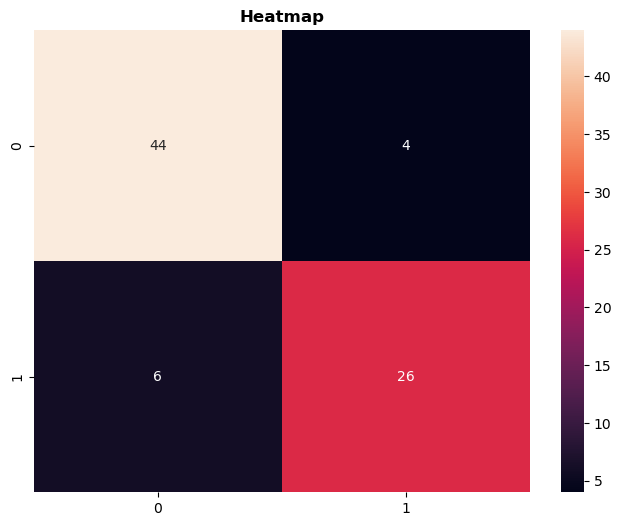

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.title("Heatmap",fontweight="bold")
plt.show()

In [115]:
clr=classification_report(y_test,pred)

In [117]:
print(clr)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        48
           1       0.87      0.81      0.84        32

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.87        80
weighted avg       0.87      0.88      0.87        80



# Hyperperameter Tunning

In [118]:
gb=GradientBoostingClassifier()

In [125]:
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
# loss{‘log_loss’, ‘deviance’, ‘exponential’}
# # criterion{‘friedman_mse’, ‘squared_error


In [129]:
param={"n_estimators":[50,75,100,120,140],
      "learning_rate":[0.01,0.1,0.5,1.0,2.0],
      "max_depth":range(1,5)}

param

{'n_estimators': [50, 75, 100, 120, 140],
 'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0],
 'max_depth': range(1, 5)}

In [135]:
param2={"n_estimators":[50,75,100,120,140],
      "learning_rate":[0.01,0.1,0.5,1.0,2.0],
      "max_depth":range(1,5),
      "criterion":["friedman_rate","squared_error"],
      "loss":["log_loss","deviance","exponential"]}
param2

{'n_estimators': [50, 75, 100, 120, 140],
 'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0],
 'max_depth': range(1, 5),
 'criterion': ['friedman_rate', 'squared_error'],
 'loss': ['log_loss', 'deviance', 'exponential']}

In [136]:
gcv=GridSearchCV(estimator=gb,param_grid=param2,cv=5,n_jobs=-1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_rate', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': range(1, 5),
                         'n_estimators': [50, 75, 100, 120, 140]})

In [141]:
accuracy=gcv.score(x_test,y_test)
accuracy2=gcv.score(x_train,y_train)

In [142]:
print("-"*110)
print(f"The Accuracy of the test data After the HyperTunning : {accuracy}")
print("-"*110)
print(f"the Accuracy of the Train data After the HypeTunning : {accuracy2}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The Accuracy of the test data After the HyperTunning : 0.9125
--------------------------------------------------------------------------------------------------------------
the Accuracy of the Train data After the HypeTunning : 0.91875
--------------------------------------------------------------------------------------------------------------


In [143]:
bp=gcv.best_params_

In [144]:
print("-"*110)
print(bp)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
{'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 75}
--------------------------------------------------------------------------------------------------------------


In [147]:
sc=gcv.best_score_

In [148]:
print("-"*110)
print(f"Accuracy of the Model : {sc}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
Accuracy of the Model : 0.9125
--------------------------------------------------------------------------------------------------------------


In [151]:
cl=gcv.classes_

In [152]:
print("-"*110)
print(cl)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
[0 1]
--------------------------------------------------------------------------------------------------------------


In [153]:
gcv.cv_results_

{'mean_fit_time': array([0.0123333 , 0.00312548, 0.00312467, 0.00625143, 0.00312414,
        0.00937414, 0.00625086, 0.00937533, 0.00937343, 0.00624962,
        0.00937748, 0.00312634, 0.00625005, 0.00670142, 0.00669856,
        0.0031559 , 0.0031559 , 0.005232  , 0.00312586, 0.005232  ,
        0.00312486, 0.00312486, 0.00937538, 0.00312586, 0.00625052,
        0.00312467, 0.00625057, 0.00625005, 0.00312471, 0.00632467,
        0.00943546, 0.00446591, 0.00715985, 0.00317903, 0.00493255,
        0.00715652, 0.00630593, 0.00493255, 0.0062531 , 0.00630593,
        0.00626898, 0.00624714, 0.00323148, 0.0046309 , 0.00625033,
        0.00625362, 0.00625033, 0.00937457, 0.00625362, 0.00312519,
        0.0062499 , 0.00625362, 0.00312519, 0.00624948, 0.0062499 ,
        0.00624909, 0.007162  , 0.00543337, 0.00624862, 0.00625091,
        0.00313363, 0.007162  , 0.00543337, 0.00624862, 0.        ,
        0.00625963, 0.00150414, 0.00632401, 0.00627136, 0.00312438,
        0.00624914, 0.00625963,

In [159]:
ft=gcv.refit_time_

In [160]:
print("-"*110)
print(f"Reffiting time taken by Model in Second : {ft}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
Reffiting time taken by Model in Second : 0.03128623962402344
--------------------------------------------------------------------------------------------------------------


In [162]:
pred2=gcv.predict(x_test)

In [163]:
print("-"*110)
print(pred2)
print("-"*110)


--------------------------------------------------------------------------------------------------------------
[1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 1 1]
--------------------------------------------------------------------------------------------------------------


In [166]:
cm2=confusion_matrix(y_test,pred2)

In [170]:
print("-"*110)
print(cm2)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
[[43  5]
 [ 2 30]]
--------------------------------------------------------------------------------------------------------------


In [171]:
clr2=classification_report(y_test,pred)

In [173]:
print("-"*110)
print(clr2)
print("-"*110)


--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        48
           1       0.87      0.81      0.84        32

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.87        80
weighted avg       0.87      0.88      0.87        80

--------------------------------------------------------------------------------------------------------------


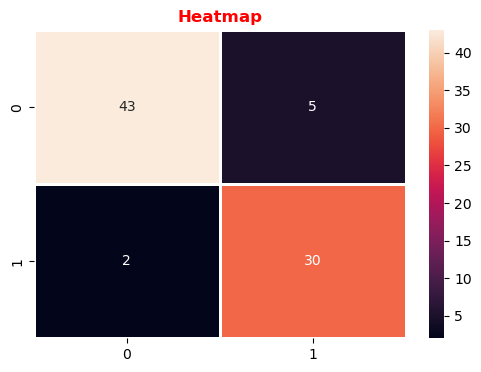

In [175]:
plt.figure(figsize=(6,4))
sns.heatmap(cm2,annot=True,linewidths=1,linecolor="w")
plt.title("Heatmap",fontweight="bold",color="red")
plt.show()

## Creating a Data Frame Before the Hyperperameter Tunning and Before Tunnig Accuracy

In [184]:
prince=pd.DataFrame({"test_Accuracy":[ac,accuracy],"train_Accuracy":[acc,accuracy2]},index=["Before_Tunning","After_Tunning"])

In [189]:
print("-"*110)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [190]:
prince

,test_Accuracy,train_Accuracy
Before_Tunning,0.8750,0.97500
After_Tunning,0.9125,0.91875


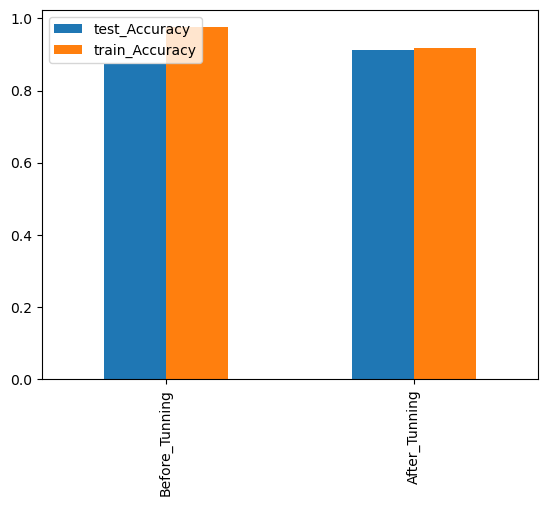

In [197]:
prince.plot(kind="bar");

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

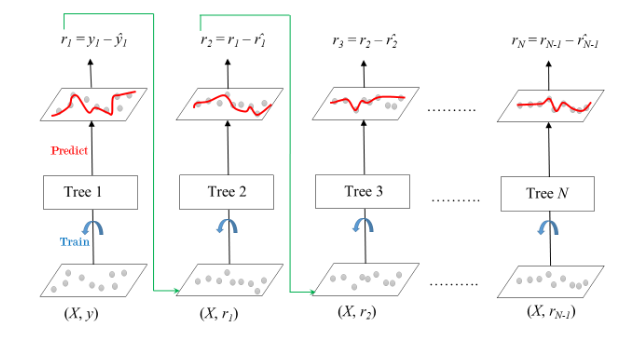

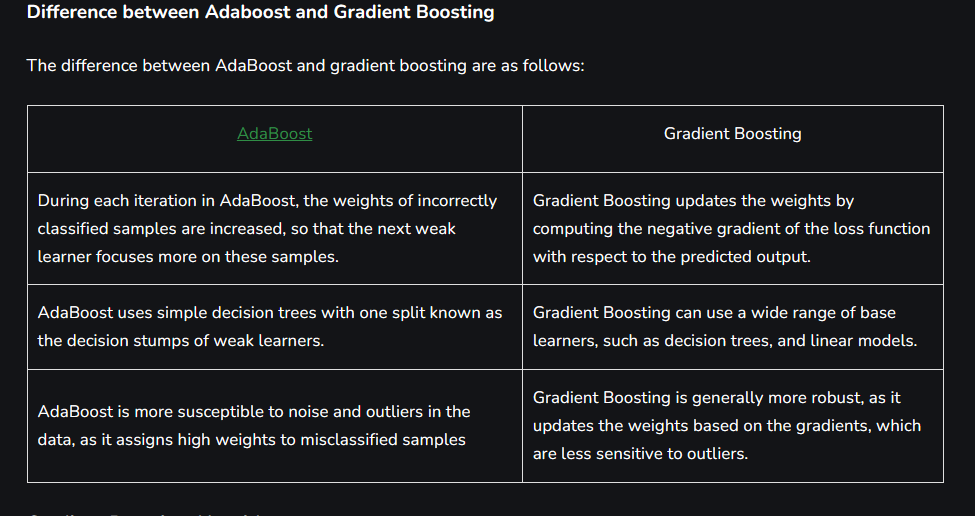

## Thanks For Wathching My Notebook _______________________________📝📝📝📝📝